In [1]:
import importlib
import Enviroment
import networkx as nx

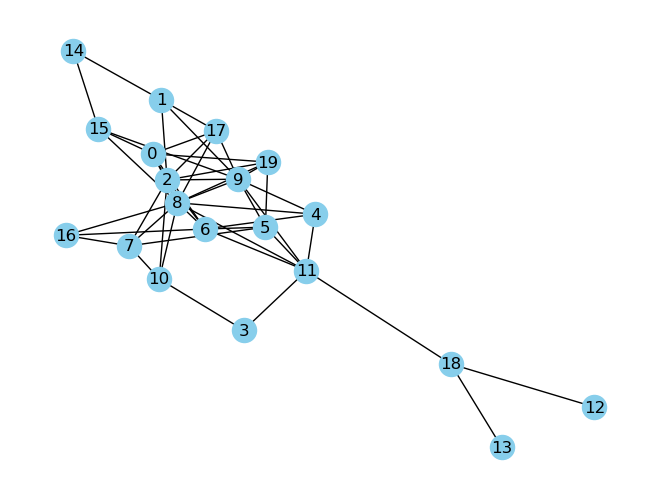

In [4]:
importlib.reload(Enviroment)

env = Enviroment.Env()

env.visualize()

In [5]:
env.get_state()

In [9]:
env.valid_clique_merges()

[(frozenset({1, 2, 9, 17}), frozenset({1, 14})),
 (frozenset({1, 2, 9, 17}), frozenset({5, 9, 11})),
 (frozenset({1, 2, 9, 17}), frozenset({5, 9, 19})),
 (frozenset({1, 2, 9, 17}), frozenset({0, 2, 8, 17})),
 (frozenset({1, 2, 9, 17}), frozenset({0, 2, 8, 19})),
 (frozenset({1, 2, 9, 17}), frozenset({0, 2, 6, 8})),
 (frozenset({1, 2, 9, 17}), frozenset({2, 8, 9, 17})),
 (frozenset({1, 2, 9, 17}), frozenset({2, 8, 9, 19})),
 (frozenset({1, 2, 9, 17}), frozenset({2, 7, 8, 10})),
 (frozenset({1, 2, 9, 17}), frozenset({4, 8, 9, 11})),
 (frozenset({1, 2, 9, 17}), frozenset({8, 9, 15})),
 (frozenset({1, 14}), frozenset({14, 15})),
 (frozenset({3, 10}), frozenset({3, 11})),
 (frozenset({3, 10}), frozenset({2, 7, 8, 10})),
 (frozenset({3, 11}), frozenset({5, 9, 11})),
 (frozenset({3, 11}), frozenset({5, 6, 11})),
 (frozenset({3, 11}), frozenset({4, 8, 9, 11})),
 (frozenset({3, 11}), frozenset({4, 6, 8, 11})),
 (frozenset({3, 11}), frozenset({11, 18})),
 (frozenset({5, 9, 11}), frozenset({5, 9,

In [19]:
import numpy as np
def analyze_strategy(agent):
    # 1. Preferred Merge Sizes
    merge_sizes = [len(a[0])+len(a[1]) for a in agent.memory]
    print(f"Average merge size: {np.mean(merge_sizes):.1f} nodes")
    
    # 2. Feature Correlation
    feature_impact = agent.q_net.feature_importances()
    print("Most influential features:")
    for feat, weight in sorted(feature_impact.items(), key=lambda x: -x[1]):
        print(f"- {feat}: {weight:.2f}")

In [ ]:
import Trainer
import Enviroment
import Agents
import matplotlib.pyplot as plt

importlib.reload(Enviroment)
importlib.reload(Trainer)
importlib.reload(Agents)

env = Enviroment.ChordalGraphEnv()
agent = Agents.KNNGraphAgent()
trainer = Trainer.ChordalTrainer(agent, env)
    
# Train with progress tracking
rewards = trainer.train(num_episodes=10)
    
# Visualize learning progress
plt.plot(rewards)
plt.title("Learning Progress")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()
    
# Extract strategic insights
analyze_strategy(agent)